In [2]:
#Titanic data set from Kaggle
#Predicts training data with 80% accuracy

import numpy as np 
import pandas as pd 

In [5]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data = pd.read_csv("test.csv")
test_data.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
sum(women)*100/len(women)

74.20382165605096

In [8]:
women = train_data.loc[train_data.Sex == 'male']["Survived"]
sum(women)*100/len(women)

18.890814558058924

In [9]:

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='Age'>

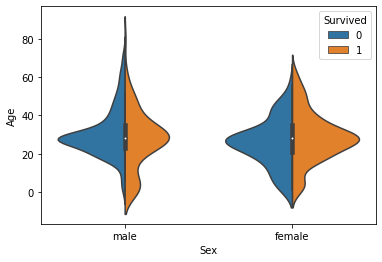

In [10]:
#Shows correlatoin with age and gender

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.violinplot(x="Sex", y = "Age", hue = "Survived", data = train_data, split = True)

<AxesSubplot:xlabel='Sex'>

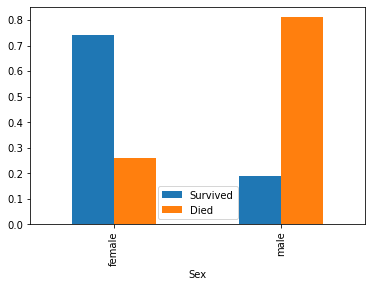

In [11]:
#Shows correlation with gender

train_data['Died'] = 1 - train_data['Survived']
train_data.groupby('Sex')[['Survived', 'Died']].agg('mean').plot(kind='bar')


<AxesSubplot:xlabel='Pclass,Sex'>

<Figure size 9000x504 with 0 Axes>

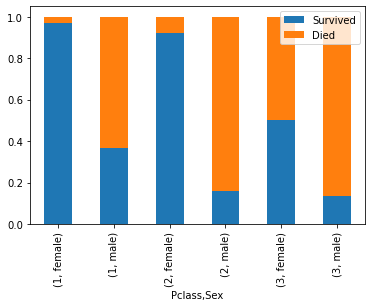

In [12]:
#Shows correlation with class and gender
train_data.head()
plt.figure(figsize=(125,7))
train_data.groupby(['Pclass','Sex'])[['Survived','Died']].agg('mean').plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='Age'>

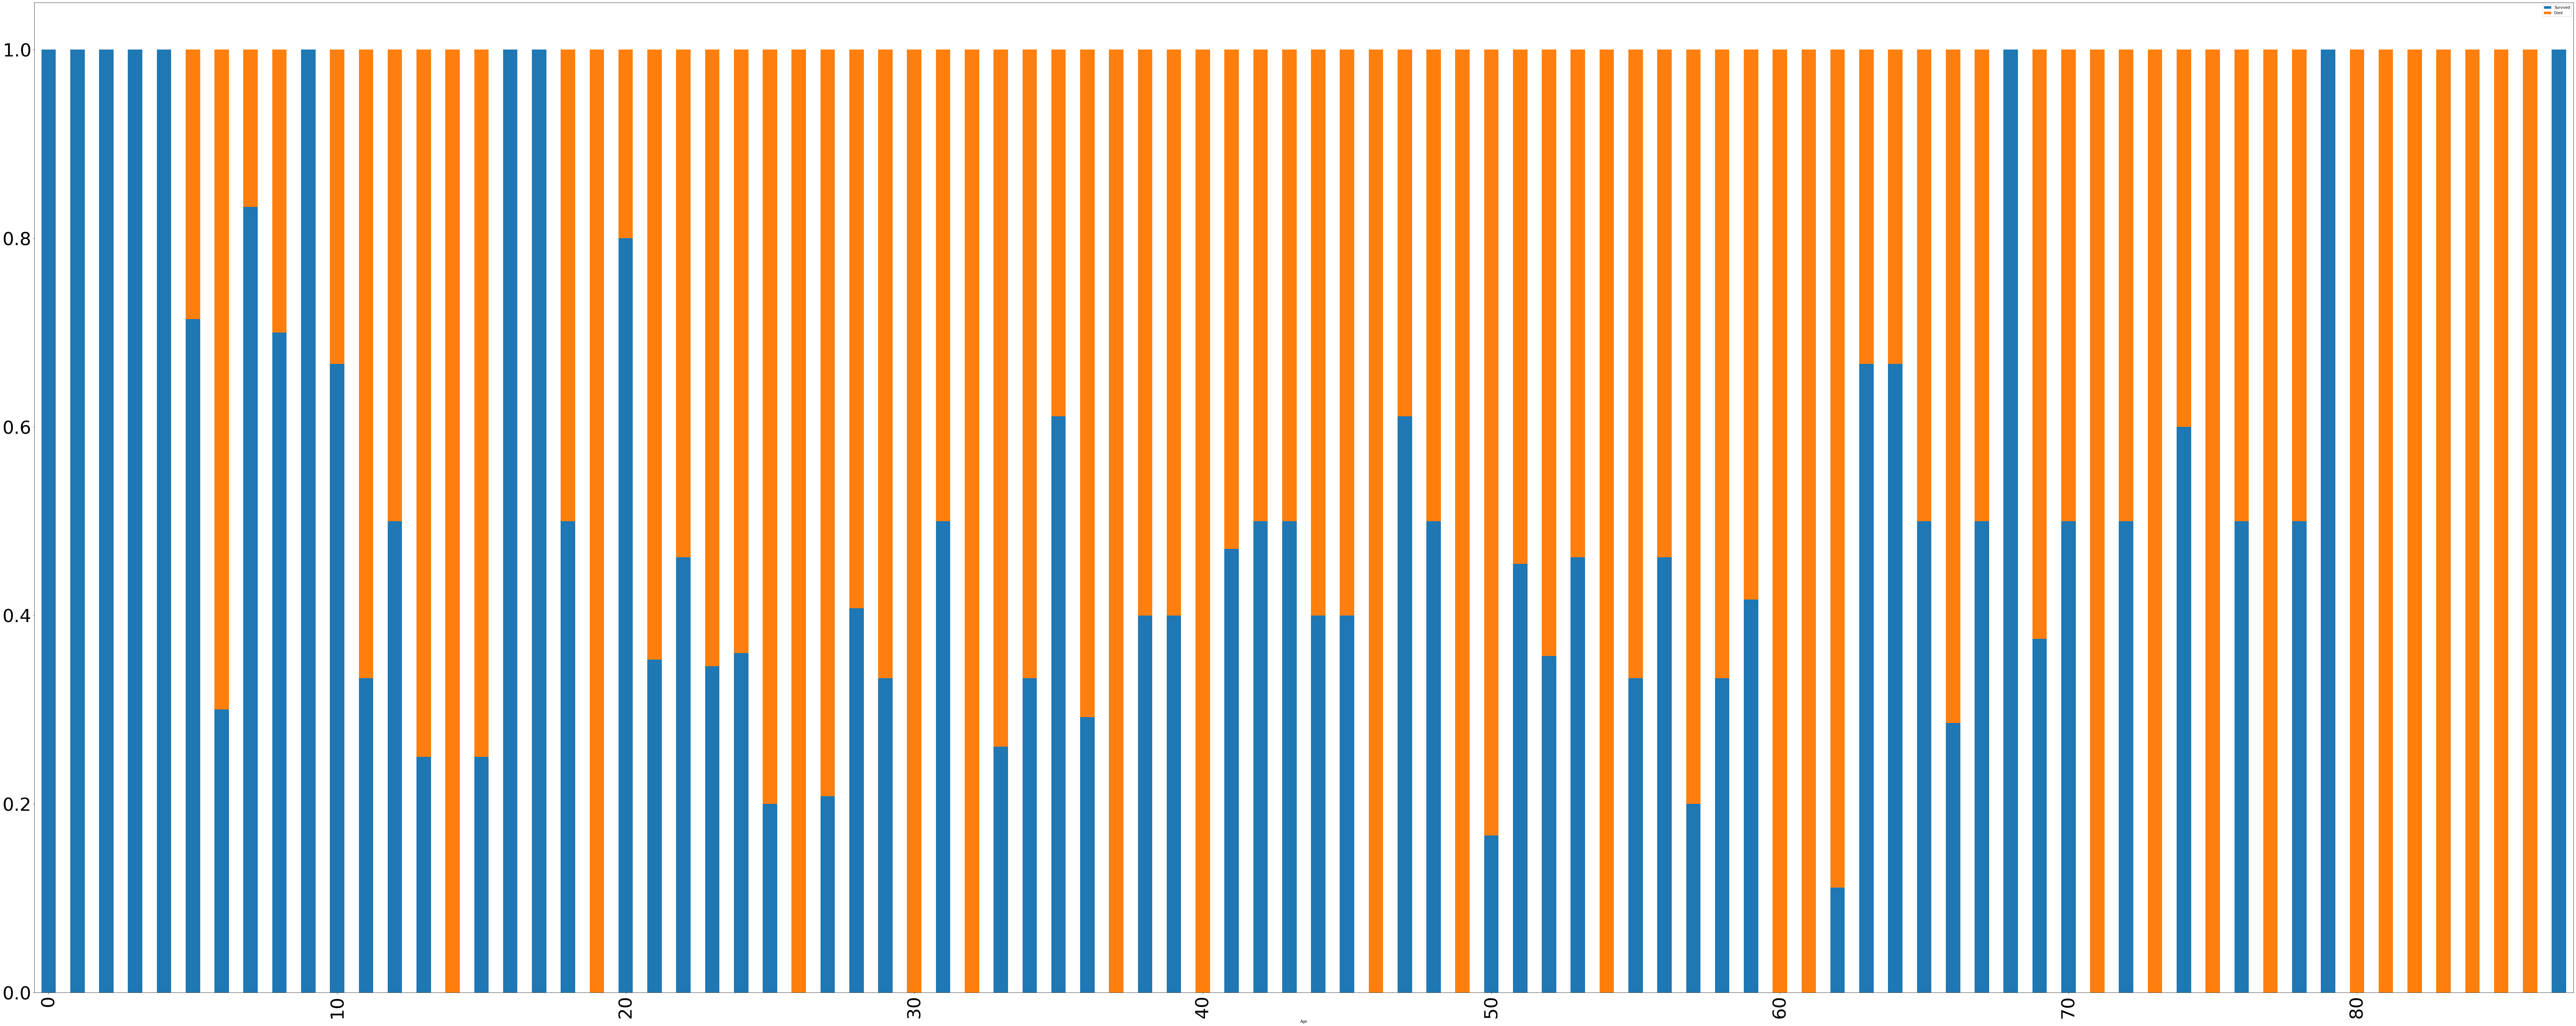

In [13]:
#Shows correlation with Age
x = [0, 10, 20, 30, 40, 50, 60, 70, 80]
train_data.groupby(['Age'])[['Survived','Died']].agg('mean').plot(kind='bar',figsize=(125,50), xticks = x, fontsize= 50, stacked = True)

<AxesSubplot:xlabel='Age'>

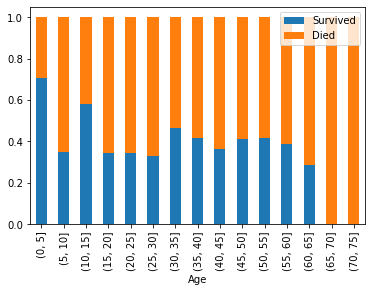

In [14]:
#Shows correlation with age 

bins = pd.cut(train_data['Age'], np.arange(0, 80, 5))
train_data.groupby(bins)[['Survived','Died']].agg('mean').plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

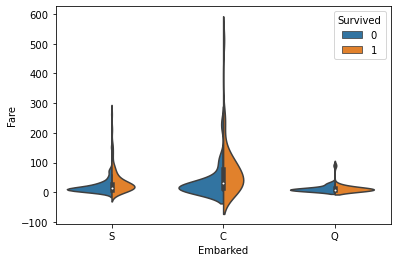

In [15]:
#Shows correlation with embarkment port
train_data["Embarked"].unique()
train_data.head()
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_data, split=True)

In [20]:
#Feature Engineering 
targets = train_data.Survived
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [21]:
train.drop(["Survived"], axis = 1, inplace = True)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#Appends training and test data
combined = train.append(test)
combined.reset_index(inplace = True)
combined.drop(['index','PassengerId'], axis = 1, inplace = True)

In [23]:
#Extracting titles
combined["Title"] = combined["Name"].map(lambda x: x.split(', ')[1].split('.')[0].strip())

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

combined["Title"] = combined["Title"].map(Title_Dictionary)
combined["Title"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305       NaN
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [24]:
#Got median age for imputation

combined.head()
sum(combined.Age.isna())

grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
m_grouped_train = grouped_train.median()
m_grouped_train = m_grouped_train.reset_index()[['Sex','Pclass','Title','Age']]
m_grouped_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


In [25]:
def fill_age(row):
    condition = (
        (m_grouped_train['Sex'] == row['Sex']) & 
        (m_grouped_train['Title'] == row['Title']) & 
        (m_grouped_train['Pclass'] == row['Pclass'])
    ) 
    return m_grouped_train[condition]['Age'].values[0]

combined['Age'] = combined.apply(lambda row: fill_age(row) if pd.isna(row['Age']) else row['Age'], axis=1)

In [26]:
#One-hot encoding of title column

combined.drop('Name', axis = 1, inplace = True)
titles_dummies = pd.get_dummies(combined['Title'], prefix = 'Title')
combined = pd.concat([combined, titles_dummies], axis = 1)
combined.drop('Title',axis=1, inplace = True)
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [27]:
#Imputing fare
combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
combined.iloc[1083]

Pclass                  3
Sex                  male
Age                  11.5
SibSp                   1
Parch                   1
Ticket           A/5. 851
Fare                 14.5
Cabin                 NaN
Embarked                S
Title_Master            1
Title_Miss              0
Title_Mr                0
Title_Mrs               0
Title_Officer           0
Title_Royalty           0
Name: 1083, dtype: object

In [28]:
#Imputating Embarkment

most_frequent = combined['Embarked'].value_counts().idxmax()
combined.Embarked.fillna(most_frequent, inplace=True)

embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis = 1)
combined.drop('Embarked', axis = 1, inplace = True)

In [29]:
#Processing Cabin

combined.Cabin.fillna('U', inplace=True)
combined.Cabin = combined.Cabin.map(lambda a: a[0])
combined.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [30]:
cabin_dummies = pd.get_dummies(combined['Cabin'], prefix = 'Cabin')
combined = pd.concat([combined, cabin_dummies], axis = 1)
combined.drop('Cabin', axis = 1, inplace = True)

In [31]:
#Processing Sex
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combined['Sex'] = encoder.fit_transform(combined['Sex'])

In [32]:
#Processing family
combined['Family_size'] = combined['SibSp'] + combined['Parch'] + 1
combined.head()

combined['Single'] = combined['Family_size'].map(lambda a: 1 if a == 1 else 0)
combined['SmallFamily'] = combined['Family_size'].map(lambda a: 1 if 2 <=a<=4 else 0)
combined['LargeFamily'] = combined['Family_size'].map(lambda a: 1 if a >= 5 else 0)
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Family_size,Single,SmallFamily,LargeFamily
0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,0,0,0,0,0,1,2,0,1,0
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,0,0,0,0,0,1,1,1,0,0
3,1,0,35.0,1,0,113803,53.1000,0,0,0,...,0,0,0,0,0,0,2,0,1,0
4,3,1,35.0,0,0,373450,8.0500,0,0,1,...,0,0,0,0,0,1,1,1,0,0


In [33]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'


# Extracting dummy variables from tickets:

combined['Ticket'] = combined['Ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
combined = pd.concat([combined, tickets_dummies], axis=1)
combined.drop('Ticket', inplace=True, axis=1)

In [34]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,3,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
train = combined.iloc[:891]
test = combined.iloc[891:]

In [38]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
train2 = train
clf = clf.fit(train2, targets)

<AxesSubplot:ylabel='feature'>

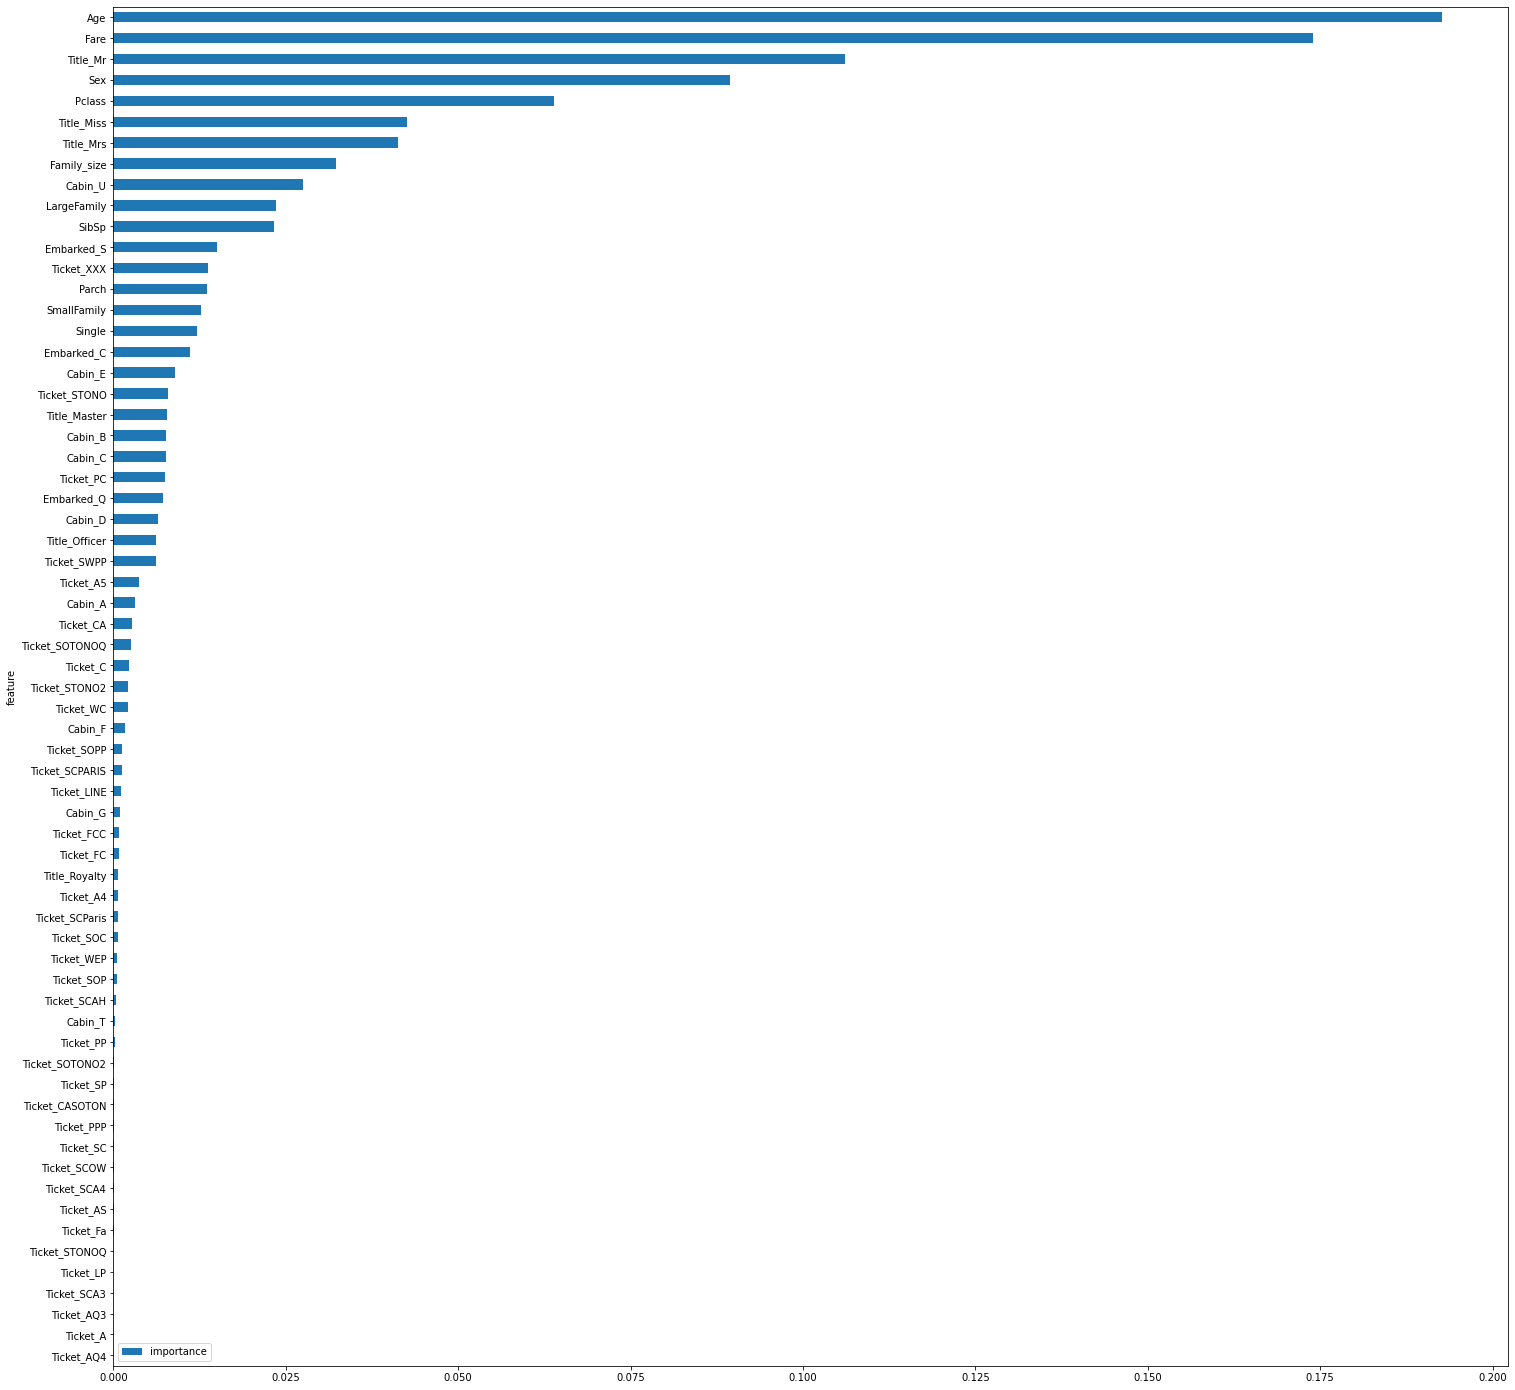

In [39]:
#Feature Selection

features = pd.DataFrame()
features['feature'] = train2.columns
features['importance'] = clf.feature_importances_
features.sort_values(by = "importance", ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind="barh", figsize=(25,25))

In [40]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train2)
print(train_reduced.shape)
# (891L, 14L)
test2 = test
test_reduced = model.transform(test2)
print(test_reduced.shape)
# (418L, 14L)

(891, 11)
(418, 11)


In [48]:
#Different models

from xgboost import XGBRegressor

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)


logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV(max_iter=400)
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()


models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8192957127612832
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>


/Users/aditjindal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aditjindal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

CV score = 0.8237900947837549
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8092210156299041
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8327663046889711
****


In [44]:
gboost.fit(train_reduced, targets)
predictions = gboost.predict(test_reduced)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index = False)
print("done")

done
